In [3]:
#5.6 Affline / Softmaxレイヤの実装
#5.6.1 Affline

#おさらい
#3.3 多次元配列の計算
import numpy as np
A = np.array([1,2,3,4])
print(A)


[1 2 3 4]


In [2]:
np.ndim(A)

1

In [3]:
A.shape

(4,)

In [4]:
A.shape[0]

4

In [5]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [6]:
np.ndim(B)

2

In [7]:
B.shape

(3, 2)

In [8]:
A = np.array([[1,2],[3,4]])

In [9]:
A.shape

(2, 2)

In [10]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [11]:
np.dot(A, B)
\

array([[19, 22],
       [43, 50]])

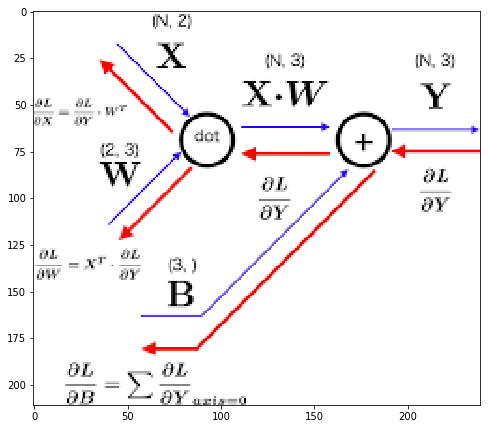

In [12]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod029.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

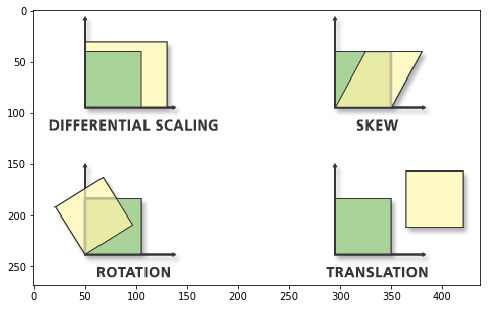

In [4]:
#因みにshapeはカタチづけるとか方向づける
#Affin空間
#こればかりはイメージで入ったほうが早い。
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod030.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [5]:
#図形を変換するって感じかな。
#専門的用語をかますと、幾何学の分野である図形を回転させたり引き延ばす変換処理の事をaffin変換という。
#平行移動、線形変換を組み合わせた変換の事。

#線形変換；変換の前に直線だった場所は、返還後も直線のまま保たれる、変換の事。直線が変換によって曲がる事もない。
#直線上に点A,B,Cが並んでいた時、変換の前後でAB:BCの比が変換しない。
#線の形が変わらないから線形変換

#Differential scaling：差動スケーリング
#skew：ゆがみ
#rotation：回転
#translation：置き換え

#2次元の図形だと、線形変換は元の座標に2x2の行列を掛ける事で表現可能
#平行移動は2次元のベクトルの加算で表現可能。
#x,yが元の座標、x',y'が返還後の座標。
#２ｘ２の行列が線形変換でtx,tyが平行移動

#(x')=(a b)(x)   (tx)
#(y')=(c d)(y) + (ty)

#次元を1つ上げた3次元の座標（同次座標と呼ぶ）を導入すると、上記を1つの行列の乗算にまとめてしまう事が可能。
#これを同次変換という

#(x')=(a b tx)(x)
#(y')=(c d ty)(y)
#(1) =(0 0  1)(1)

#これが座標変換であり、例えばUnityとかで座標があってx,y,z軸があって、その0を基準に±で考えるよね。
#つまり、初めて聞いたような言葉であっても知らないうちに使っている場合があるのであーる。

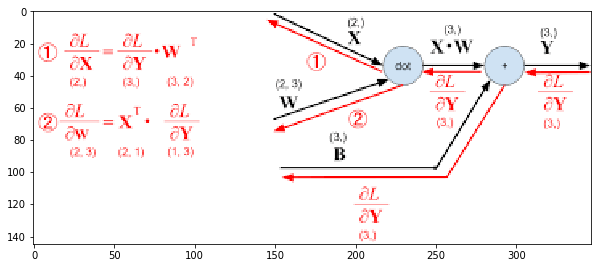

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod031.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

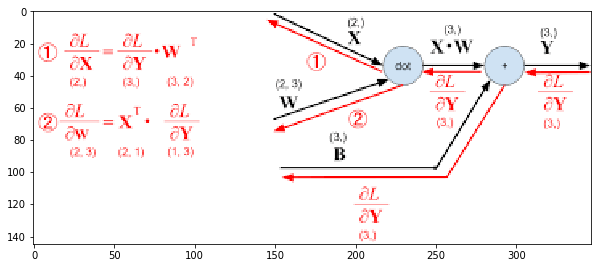

In [4]:
#上記は既に完成形の図だからややこしいけれど、Affineレイヤーの計算式
#行列の積を計算するノードを[dot]として表すことにすると、np.dot(X ,W) + Bの計算は上記で表せる。
#(N, 2)X
#(2, 3)W
#(3,  )B
#これまで見て来た計算グラフはスカラ値（「スカラーとは、配列とかと異なり、より小さな部分に'分割する'ことが できない値のことです。」）
#がノード間で流れていたが、今回は行列がノード間を伝播することになる。

#逆伝播の考え方も行列の要素ごとに書き、同手順で計算することが可能
#∂L/∂X = ∂L/∂Y・W^T ※Tは転置を表す。W(i,j)→W(j,i)の要素に入れ替える事を言う。
#                          (W11 W21)
#W = (W11 W12 W13) → W^T  (W12 W22)
#    (W21 W22 W23)         (W13 W23)

#∂L/∂X = ∂L/∂Y・W^T
# (2,)     =  (3,) ・(3,2)

#∂L/∂W = X^T・∂L/∂Y
#(2,3) = (2,1)・(1,3,)

#X = ∂L/∂X　は同形状
#W = ∂L/∂W  も同形状

#X       = (x0,x1,…xn)
#∂L/∂X = (∂L/∂x0,∂L/∂x1,…,∂L/∂xn)
#上記の数式も同じとなる

#行列の積は対応する次元の要素数を一致させる必要があり、その一致を確認する事で、数式
#∂L/∂X = ∂L/∂Y・W^T
# (2,)     =  (3,) ・(3,2)
#を導き出せる。
#例) ∂L/∂Y  (3,) W(2,3)の時、∂L/∂Xの形状が(2,)になるように　∂L/∂Y　と　W　の積を考える
#そうすると
#∂L/∂Y・W^T = ∂L/∂X
# (3,)　 (3,2)   (2,)

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod031.png')
plt.figure(figsize=(10, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

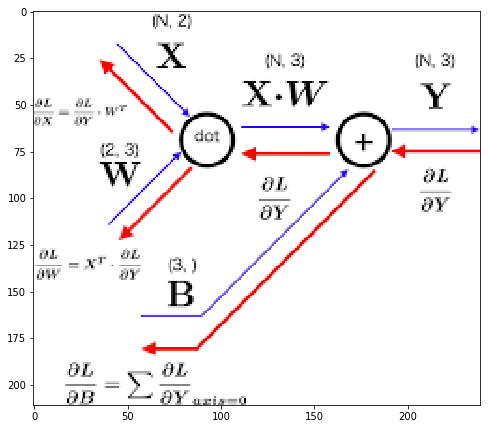

In [2]:
#①∂L/∂Y・W^T = ∂L/∂X　のように計算グラフを見て導き出せるようになる。
# 　(3,)　 (3,2)   　(2,)

#5.6.2　バッチ版affineレイヤー
#これまで説明してきたものは1つのデータを運ぶことしか出来なかったが、纏めて伝播する。つまりパッチする。
#上記の図と変更となったのは、Xの部分が(N,2)になった事。

import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod032.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [4]:
#バイアス加算（B)に関しては、X・Wに対して、それぞれのデータに加算される。
#N=2だったとしたとき、バイアスはその2個のデータそれぞれに対して加算される。

X__dot__W = np.array([[0,0,0],[10,10,10]])
B = np.array([1, 2, 3])

In [5]:
X__dot__W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [6]:
X__dot__W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [7]:
#順伝播のバイアスの加算は、それぞれのデータ（1,2個目のデータ…）に対して、加算される。
#その為、逆伝播の際にはバイアスの要素に集約される必要がある。

dy = np.array([[1,2,3],[4,5,6]])
dy

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
dB = np.sum(dy, axis=0)
dB

array([5, 7, 9])

In [10]:
#この例ではデータが2個あるとして、その2個のデータに対しての微分をデータごとに合算して求めている。
#その為、np.sum()で、0番目の軸（データを単位とした軸）に対して（axis(軸って意味)=0)の総和を求めるのです。
#以上から、Affineの実装

class Affine:
    def __init__(self,W,b):
        self.W = w
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

        def forwad(self, x):
            self.x = x
            out = np.dot(x.self.W) + self.b

        def backword(self, dout):
            dx = np.dot(dout, self.W.T)
            self.dW = np.dot(self.x.T, dout)
            self.db = np.sum(dout,axis=0)

            return dx


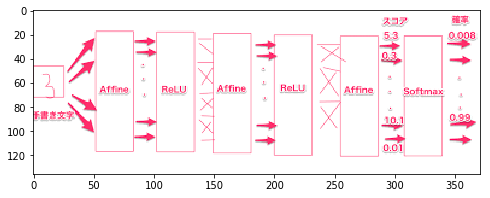

In [12]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod033.png')
plt.figure(figsize=(8, 10)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

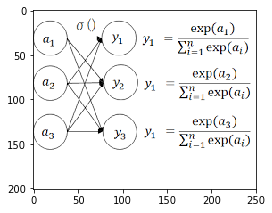

In [15]:
#softmax-with-lossレイヤー
#出力層であるソフトマックス関数について
#ソフトマックス関数は入力された値を正規化してくれる。復習になりますが…？？？復習？？？
#やってまえしたね…351で…・。

#おさらい
#3_5出力層の設計
#ニューラルネットワークは分類と回帰問題の両方に用いる。そのどちらかの出力層に対して活性化関数を使い分ける
#回帰問題は恒等関数、分類問題はソフトマックス関数を使う

#3_5_1 ソフトマックス関数
#              n
#yk = exp(ak)/∑ exp(ai)
#             i=1
#上記のように表す
#分子が入力信号akの指数関数
#分母が入力信号全総和となっている

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod034.png')
plt.figure(figsize=(4, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [16]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) #指数関数
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [17]:
sum_exp_a = np.sum(exp_a) #指数関数総和
print(sum_exp_a)

74.1221542101633


In [18]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [19]:
#これが基本で注意点は指数関数がオーバーフローを起こしてしまう点ということだが、簡単に言うと小数がどっかんどっかん
#出てくるから、それが処理できないんじゃって事になるので、それを抑える工夫をしましょうって感じになっていたのが
#おさらい

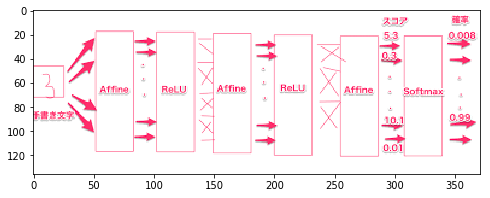

In [20]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod033.png')
plt.figure(figsize=(8, 10)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

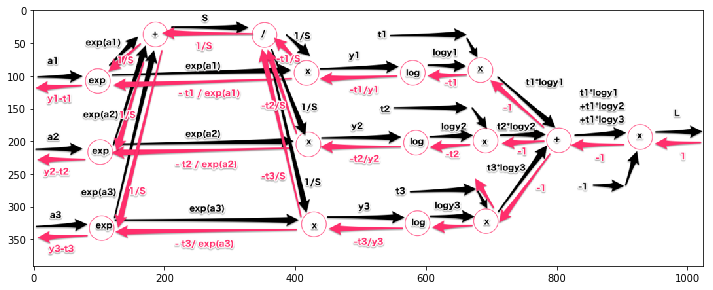

In [27]:
#その上で上記。簡単に言うと10個のバラバラの数値でも、それを％化してくれて「１」に収めてくれる。
#その為、どれが一番データとして正しいのかを比率してわかる。

#ニューラルネットワークでは推論、学習のフェーズで分かれている。
#通常ニューラルネットワークの推論でSoftmax関数を使う事はないけれど、推論を行う時は最後のAffineレイヤにて出力
#を認識結果として用いる。
#ニューラルネットワークが正しく正規化しない出力結果（上記だと300辺りのAffinレイヤーの結果）をスコアと呼ぶ事がある。
#ニューラルネットワークの学習時にはSoftmaxレイヤを必要とするけれど、スコアが高い時点でこれでいいってなるため、
#最後のSoftmax関数はいらなくてもいいんじゃね？っていう推論。

#Softmaxレイヤーとエントロピー誤差を含めてレイヤー実装を行う。グラフは下記。

img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod035.png')
plt.figure(figsize=(12, 14)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

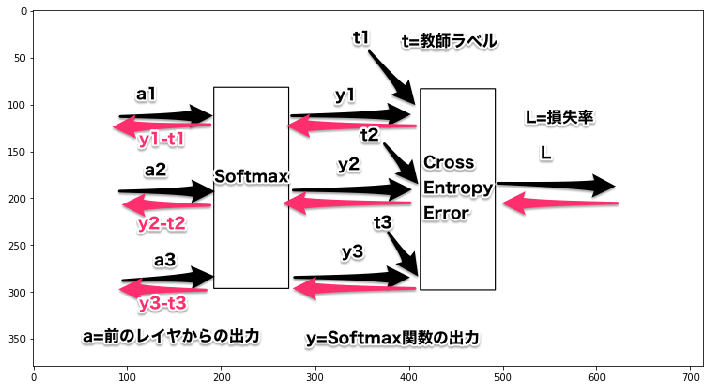

In [28]:
img = imread('D:/python/deeplearning/pycontent/dataset/ErrorBackPropagationMethod036.png')
plt.figure(figsize=(12, 14)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [29]:
#もう少しわかりやすくしたのが上記。
#ややこしいため、ふろくがついている程だ。
#クラス分類を行う場合を想定。
#前レイヤから3つの入力（スコア）を受け取るものとする。
#Softmaxレイヤは入力の(a1,a2,a3)を正規化して(y1,y2,y3)を出力する。
#Cross Entropy Errorレイヤは、Softmaxレイヤの出力(y1,y2,y3)と、教師ラベルの(t1,t2,t3)を受け取り、
#それらのデータから損失Lを出力させる。

#こうすると逆伝播の結果が(y1-t1,y2-t2,y3-t3)と綺麗に返ってくる。
#Softmaxレイヤ出力(y1,y2,y3)は教師データの(t1,t2,t3)なので、(y1-t1,y2-t2,y3-t3)は
#Softmaxレイヤの出力と教師ラベルの差分となる。
#ニューラルネットワークの逆伝播ではこの差分である誤差が前レイヤへ伝わっていく。

#当初の目的：
#ニューラルネットワークの学習目的は、ニューラルネットワークの出力（Softmaxの出力）を教師ラベルに近づけるように
#重みを調整する事が目的。その為にニューラルネットワークの出力と教師ラベルとの誤差を効率よく前レイヤに伝える
#事が必要だった。結果として(y1-t1,y2-t2,y3-t3)はSoftmaxレイヤの出力と教師ラベルの差であり、現在の
#ニューラルネットワークの出力と教師ラベルの誤差を素直に表している。

#「Softmax関数」の損失関数をして「交差エントロピー誤差」を用いると(y1-t1,y2-t2,y3-t3)という綺麗な結果になる。
#綺麗な結果になる。これは「交差エントロピー誤差」がその為に設計されているものだからである。
#回帰問題では、出力層に損失関数として「2乗和誤差」を用いるが、これも同様にあたる。
#つまり、恒等関数の損失関数として「2乗和誤差：を用いても、逆伝播は(y1-t1,y2-t2,y3-t3)という綺麗な結果になる。

#例
#教師ラベル（0,1,0)であるデータに対して、Softmaxレイヤの出力が（0.3,0.2,0.5)の時。
#正解ラベルに対する確率は0.2となる。つまり、正しくない。
#この場合、Softmaxレイヤからの逆伝播は(0.3,-0.8,0.5)という大きな誤差を伝播することになる。
#この誤差が前レイヤ―に逆伝播するものだから、最終的に大きな誤差を学習してしまう。

#別例
#教師ラベル（0,1,0)であるデータに対して、Softmaxレイヤの出力が（0.01,0.99,0.0)の時。
#この場合、Softmaxレイヤからの逆伝播は(0.01,-0.01,0.0)と誤差が小さくなる。

#では…？Softmax-with-Lossレイヤ実装を行う。

In [30]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None  #損失
        self.y = None     #softmax出力
        self.t = None    #教師データ（one-hot vector)

    def forward(self,x,t):
        self.t = t
        self.y = softmax(x)
        self.t = cross_entropy_error(self.y,self.t)

        return self.loss

    def backward(self,dout=1):
        batch_size = self.shape[0]
        dx = (self.y -self.t) / batch_size

        return dx

In [ ]:
#上記実装は424のバッチ対応版交差エントロピー誤差の実装
#352：ソフトマックス関数の実装上の注意
#双方の関数を使っている為簡単に済ませる…って事は持ってこないと駄目なのね…。
#逆伝播の場合、バッチ個数（batch_size)で割る事で、データ1戸当たりの誤差が前レイヤへ伝播する点に注意する

#5_7誤差逆伝播法の実装
#5_7_1：ニューラルネットワークの学習の全体図
#前提：
#ニューラルネットワークは適応可能な重み、バイアスがある.この重み、バイアスを訓練データに適応する事で調整する
#これを「学習」という
#1：ミニバッチ
#訓練データの中からランダムに一部のデータを選ぶ
#2：勾配算出
#各重みパラメータに関する損失関数の勾配を求める
#3：パラメータ更新
#重みパラメータを勾配方向に微笑量だけ更新する
#4：繰り返す
#１に戻る。

#そして、今回連鎖律を行っていたのはその勾配算出を行う為微分を利用していたけれど、その計算を速める為。
#つまり、目的地が見えてしまえばゴールへの戦略も早いって事。